In [65]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from spectractor import *
import spectroscopy as spec
import glob
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialization

## spectractor config

In [66]:
parameters.VERBOSE=True

In [67]:
parameters.DEBUG=True

## logbook

In [68]:
file_logbook_ctio='../ctiofulllogbook_jun2017_v4.csv'

In [69]:
df_ctio_lbk=pd.read_csv(file_logbook_ctio,sep=';')

In [70]:
df_ctio_lbk.columns

Index([u'Unnamed: 0', u'date', u'subdir', u'index', u'object', u'filter',
       u'disperser', u'airmass', u'exposure', u'focus', u'seeing', u'P', u'T',
       u'RH', u'W', u'file', u'Obj-posXpix', u'Obj-posYpix', u'Dx', u'Dy',
       u'comment', u'skip'],
      dtype='object')

In [71]:
df_ctio_lbk=df_ctio_lbk.reindex(columns=['date','P','T','RH','airmass','seeing','exposure','object','filter','disperser','focus','W','file']).set_index('date').sort_index()

In [72]:
df_ctio_lbk

,P,T,RH,airmass,seeing,exposure,object,filter,disperser,focus,W,file
date,,,,,,,,,,,,
2017-05-28T01:36:40.705,779,"5,6",60,"1,009","1,443",5,pointing,dia,Thor300,0,"8,9",reduc_20170526_001.fits
2017-05-28T01:41:52.197,780,"5,6",60,"1,007","1,39",5,pointing,dia,Ron400,0,"10,8",reduc_20170526_002.fits
2017-05-28T01:46:06.150,779,"5,9",59,"1,057","1,255",5,pointing,dia,Ron400,0,"6,8",reduc_20170526_003.fits
2017-05-28T01:50:31.257,779,"5,9",57,"1,057","1,409",5,pointing,dia,Ron400,0,"9,1",reduc_20170526_004.fits
2017-05-28T01:58:18.598,779,"5,9",0,"1,058","1,293",5,pointing,dia,Ron400,0,"14,7",reduc_20170526_005.fits
2017-05-28T02:03:27.503,779,"5,9",0,"1,06","1,197",1,pointing,dia,Ron400,0,"10,7",reduc_20170526_006.fits
2017-05-28T02:06:07.849,779,"6,1",51,"1,061","1,227",1,pointing,dia,Ron400,0,"13,6",reduc_20170526_007.fits
2017-05-28T02:07:46.850,779,"6,2",0,"1,061","1,154",1,pointing,dia,Ron400,0,"16,6",reduc_20170526_008.fits
2017-05-28T02:09:32.599,779,6,53,"1,062","1,533",1,pointing,dia,Ron400,0,"13,4",reduc_20170526_009.fits


## Data

In [73]:
path_data='/Users/dagoret/Data/CTIODataJune2017_reduced_RG715_v2_prod1/data_28may17'

In [74]:
search_string=os.path.join(path_data,'*.fits')

In [75]:
all_files_data=glob.glob(search_string)

# Spectrum Access

In [76]:
sp=spec.Spectrum()

In [77]:
sp.load_spectrum(all_files_data[0])

2018-04-26 21:19:17  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/Data/CTIODataJune2017_reduced_RG715_v2_prod1/data_28may17/reduc_20170528_069_spectrum.fits


 MAIN_ID        RA           DEC      ... SP_QUAL_5     SP_BIBCODE_5   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 185975 20 28 18.7284 -87 28 19.941 ...         C 1975MSS...C01....0H
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd185975_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd185975_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd185975_stis_003.fits


In [78]:
sp.header["OBJECT"]

'HD185975'

In [79]:
sp.header["AIRMASS"]

1.916

In [80]:
sp.disperser

'HoloPhP'

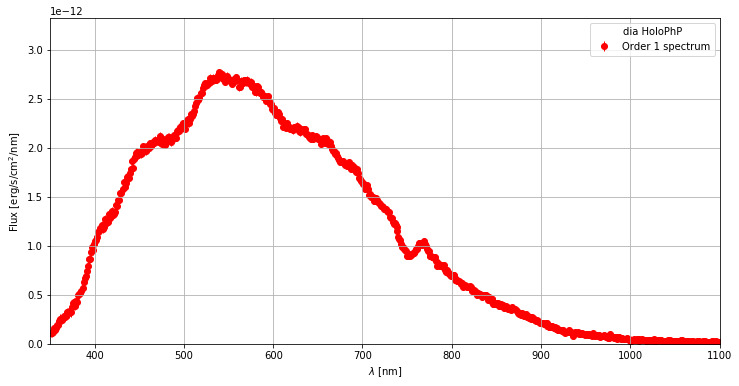

In [81]:
sp.plot_spectrum(nofit=True)

In [82]:
ls ..

README.md                       notebooks/
covariances/                    parameters.py
ctiofulllogbook_jun2017_V2.csv  parameters.pyc
ctiofulllogbook_jun2017_v4.csv  runSpectractor.py
dispersers/                     spectractor.py
dispersers.py                   spectractor.pyc
dispersers.pyc                  spectroscopy.py
extractor.py                    spectroscopy.pyc
filters.py                      statistics.py
filters.pyc                     statistics.pyc
images.py                       targets.py
images.pyc                      targets.pyc
imagesim.py                     texttable.py*
logbook.py                      texttable.pyc
mcmc.py                         tools.py
mcmc.pyc                        tools.pyc
